# A Quantitative Analysis of Dominant Champions League Winners

For this project I decided to analyse who was the best of the best. Which UEFA Champions League Winner had the most dominant win in their respective season by comparing it to the other teams. I first shortlisted a small circle of teams that I would analyse. I showed this in **TeamRanked.ipynb** by picking 4 teams of the entire era and a separate 5 teams of the modern era which offered more advanced metrics.

In [17]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Main Shortlist

In [18]:
MainShortlist =pd.read_csv('MainShortlist.csv')
print(MainShortlist)

                  Team
0      Barcelona 08/09
1      Barcelona 10/11
2    Real Madrid 17/18
3  Bayern Munich 19/20


The next thing I did was set up the csv files for each of the team's in the MainShortlist and then set them into a DataFrame. I collected this information for the csv files from the website [Fbref](https://fbref.com/en/).

In [19]:
Barca09 = pd.read_csv('Barcelona08_09.csv')
Barca09['Team'] = 'Barcelona 08/09'
Barca11 = pd.read_csv('Barcelona10_11.csv')
Barca11['Team'] = 'Barcelona 10/11'
Madrid18 = pd.read_csv('RealMadrid17_18.csv')
Madrid18['Team'] = 'Real Madrid 17/18'
Bayern20 = pd.read_csv('BayernMunich19_20.csv')
Bayern20['Team'] = 'Bayern Munich 19/20'

Then with the new DataFrames I concatenated them all together into one main DataFrame.

In [20]:
AllTeams = [Barca09, Barca11, Madrid18, Bayern20]
UCLTeams = pd.concat(AllTeams)
print(UCLTeams)

          Date                   Round    Venue        Opponent  GF  GA  \
0   13-08-2008  Third qualifying round     Home    Wisła Kraków   4   0   
1   26-08-2008  Third qualifying round     Away    Wisła Kraków   0   1   
2   16-09-2008             Group stage     Home     Sporting CP   3   1   
3   01-10-2008             Group stage     Away        Shakhtar   2   1   
4   22-10-2008             Group stage     Away           Basel   5   0   
5   04-11-2008             Group stage     Home           Basel   1   1   
6   26-11-2008             Group stage     Away     Sporting CP   5   2   
7   09-12-2008             Group stage     Home        Shakhtar   2   3   
8   24-02-2009             Round of 16     Away            Lyon   1   1   
9   11-03-2009             Round of 16     Home            Lyon   5   2   
10  08-04-2009          Quarter-finals     Home   Bayern Munich   4   0   
11  14-04-2009          Quarter-finals     Away   Bayern Munich   1   1   
12  28-04-2009           

I then added important metrics that can help me compare the teams together such as "Outcome" (The result of win,draw or loss), "Points" (3 if a Win, 1 if a Draw, 0 else), "CleanSheet" (True if Goals Against are 0 and False otherwise).

In [21]:
UCLTeams["Outcome"] = np.where(UCLTeams["GF"] > UCLTeams["GA"], 'Win', 
                      np.where(UCLTeams["GF"] < UCLTeams["GA"], 'Loss', 'Draw'))
UCLTeams["Points"] = np.where(UCLTeams["Outcome"] == 'Win', 3, 
                      np.where(UCLTeams["Outcome"] == 'Draw', 1, 0))
UCLTeams["CleanSheet"] = np.where(UCLTeams["GA"] == 0, True, False)
print(UCLTeams)

          Date                   Round    Venue        Opponent  GF  GA  \
0   13-08-2008  Third qualifying round     Home    Wisła Kraków   4   0   
1   26-08-2008  Third qualifying round     Away    Wisła Kraków   0   1   
2   16-09-2008             Group stage     Home     Sporting CP   3   1   
3   01-10-2008             Group stage     Away        Shakhtar   2   1   
4   22-10-2008             Group stage     Away           Basel   5   0   
5   04-11-2008             Group stage     Home           Basel   1   1   
6   26-11-2008             Group stage     Away     Sporting CP   5   2   
7   09-12-2008             Group stage     Home        Shakhtar   2   3   
8   24-02-2009             Round of 16     Away            Lyon   1   1   
9   11-03-2009             Round of 16     Home            Lyon   5   2   
10  08-04-2009          Quarter-finals     Home   Bayern Munich   4   0   
11  14-04-2009          Quarter-finals     Away   Bayern Munich   1   1   
12  28-04-2009           

Now it was the next part to aggregate these metrics into a table that let me compare the teams through single seasons. 

In [22]:
SummaryTable = UCLTeams.groupby('Team').agg(
    AVGPoints = ('Points', 'mean'),
    TotalGoals = ('GF', 'sum'),
    AVGGoalsFor = ('GF', 'mean'),
    AVGGoalsAgainst = ('GA', 'mean'),
    TotalCleanSheets = ('CleanSheet', 'sum')
)

print(SummaryTable)

                     AVGPoints  TotalGoals  AVGGoalsFor  AVGGoalsAgainst  \
Team                                                                       
Barcelona 08/09       1.933333          36     2.400000         0.933333   
Barcelona 10/11       2.307692          30     2.307692         0.692308   
Bayern Munich 19/20   3.000000          43     3.909091         0.727273   
Real Madrid 17/18     2.230769          33     2.538462         1.230769   

                     TotalCleanSheets  
Team                                   
Barcelona 08/09                     5  
Barcelona 10/11                     5  
Bayern Munich 19/20                 6  
Real Madrid 17/18                   3  


After getting this SummaryTable I decided to visualise the different metrics between each team.

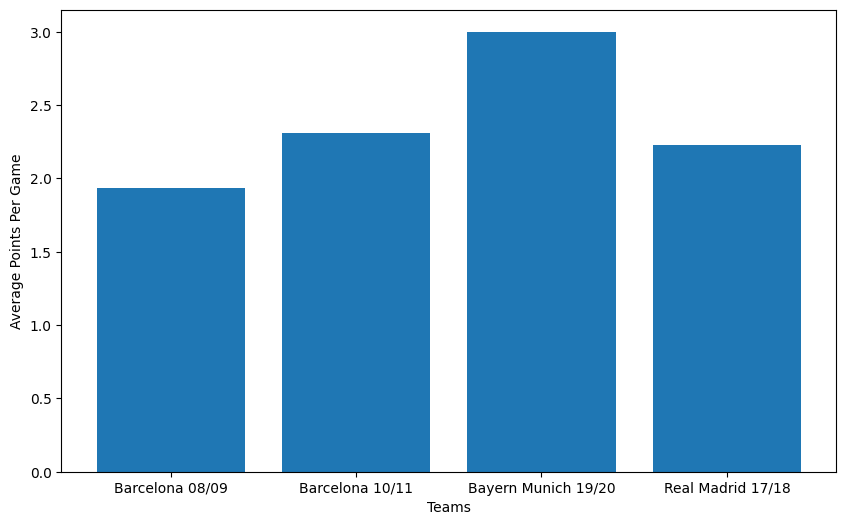

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['AVGPoints'])
plt.xlabel("Teams")
plt.ylabel("Average Points Per Game")
plt.show()

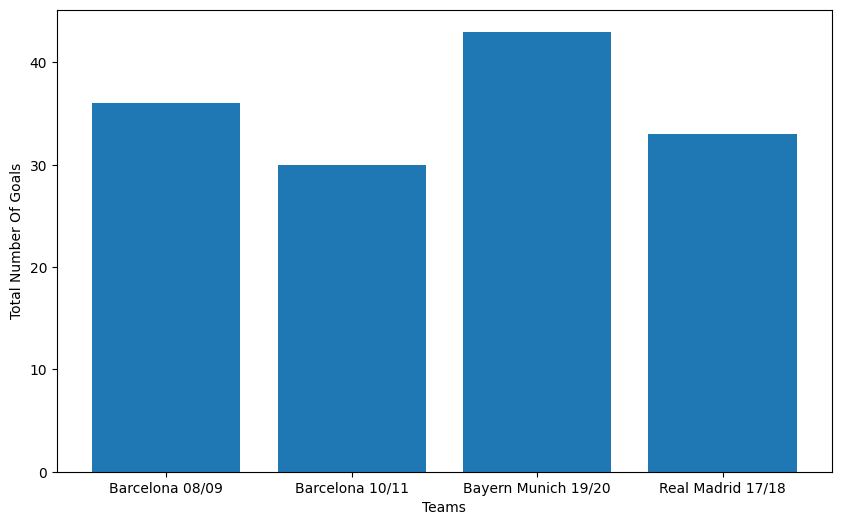

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['TotalGoals'])
plt.xlabel("Teams")
plt.ylabel("Total Number Of Goals")
plt.show()

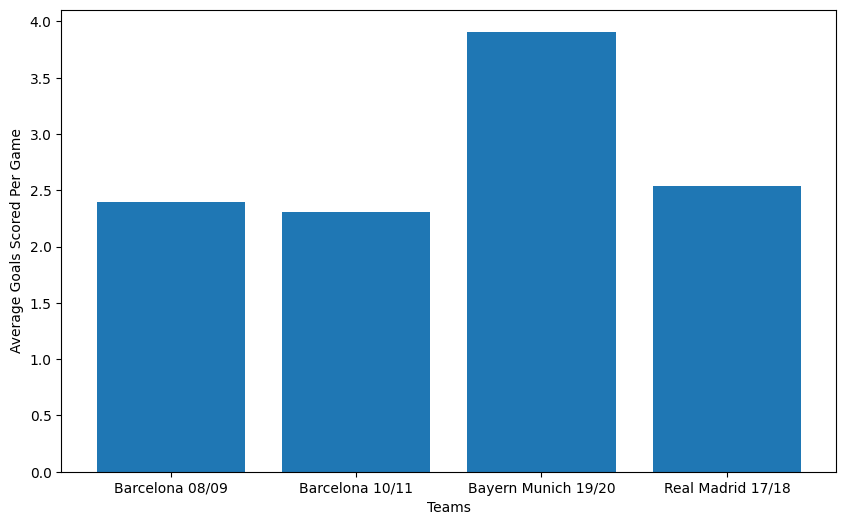

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['AVGGoalsFor'])
plt.xlabel("Teams")
plt.ylabel("Average Goals Scored Per Game")
plt.show()

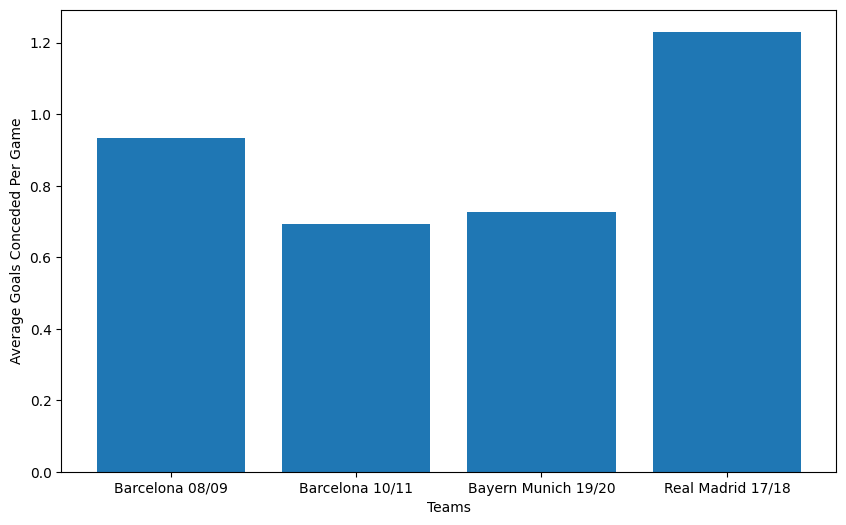

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['AVGGoalsAgainst'])
plt.xlabel("Teams")
plt.ylabel("Average Goals Conceded Per Game")
plt.show()

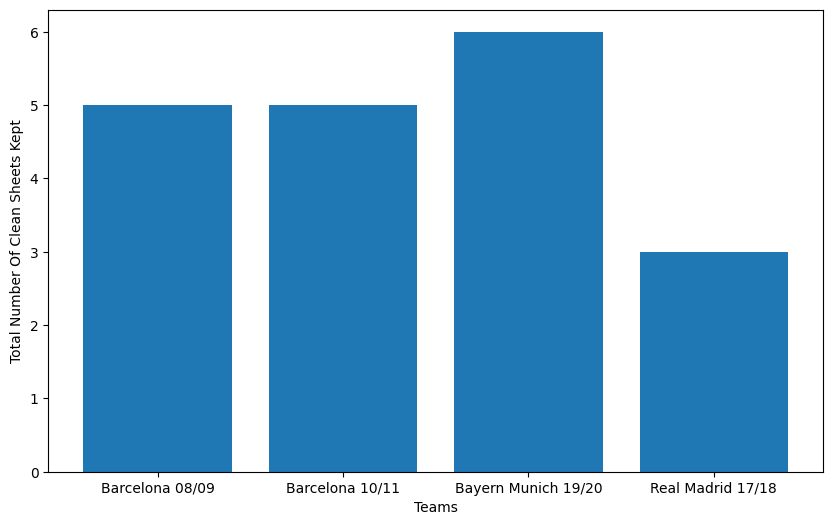

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['TotalCleanSheets'])
plt.xlabel("Teams")
plt.ylabel("Total Number Of Clean Sheets Kept")
plt.show()

After I got the bar charts plotted, I wanted to visualise it better as to which team was the most dominant so I decided to go with a radar plot.

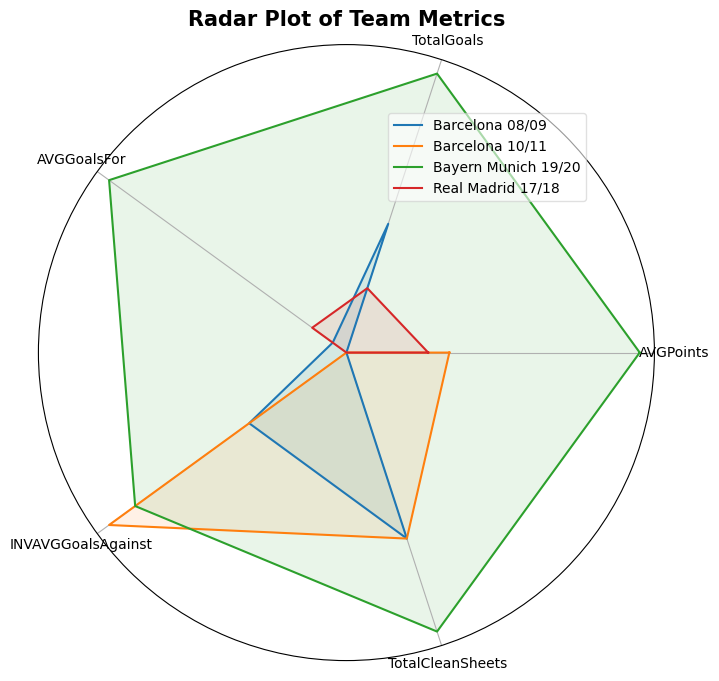

In [28]:
RadarPlot = SummaryTable.copy()
RadarPlot["INVAVGGoalsAgainst"] = 1 / (RadarPlot["AVGGoalsAgainst"] + 1e-6)
RadarPlot = RadarPlot[['AVGPoints','TotalGoals','AVGGoalsFor','INVAVGGoalsAgainst','TotalCleanSheets']]
RadarPlotNormalized = (RadarPlot - RadarPlot.min()) / (RadarPlot.max() - RadarPlot.min())
categories = RadarPlotNormalized.columns
num_vars = len(categories)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
for team in RadarPlotNormalized.index:
    values = RadarPlotNormalized.loc[team].tolist()
    values += values[:1]
    ax.plot(angles, values, label=team)
    ax.fill(angles, values, alpha=0.1)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
legend = ax.legend(loc='upper right', bbox_to_anchor=(0.9,0.9), frameon=True)
legend.get_frame().set_alpha(0.6)
plt.title("Radar Plot of Team Metrics", size=15, weight='bold')
plt.show()

From the radar plot and the bar plots I concluded that **Bayern Munich 19/20** was the most dominant team of the UCL winning seasons.
However, I felt that the data was not conclusive enough in metrics so I filtered the shortlist to include more Modern Teams that include more advanced metrics.

## Modern Shortlist

I repeated the same process but with the Modern Shortlist I found in **TeamRanker.ipynb**.

In [29]:
ModernShortlist =pd.read_csv('ModernShortlist.csv')
print(ModernShortlist)

                        Team
0        Bayern Munich 19/20
1             Man City 22/23
2            Liverpool 18/19
3          Real Madrid 21/22
4  Paris Saint-Germain 24/25


In [30]:
Liverpool18_19 = pd.read_csv('Liverpool18_19_AdvancedMetrics.csv')
Liverpool18_19['Team'] = 'Liverpool 18/19'
Bayern19_20 = pd.read_csv('Bayern19_20_AdvancedMetrics.csv')
Bayern19_20['Team'] = 'Bayern Munich 19/20'
Madrid21_22 = pd.read_csv('RealMadrid21_22_AdvancedMetrics.csv')
Madrid21_22['Team'] = 'Real Madrid 21/22'
ManCity22_23 = pd.read_csv('ManCity22_23_AdvancedMetrics.csv')
ManCity22_23['Team'] = 'Manchester City 22/23'
PSG24_25 = pd.read_csv('PSG24_25_AdvancedMetrics.csv')
PSG24_25['Team'] = 'PSG 24/25'

AllTeamsModern = [Liverpool18_19, Bayern19_20, Madrid21_22, ManCity22_23, PSG24_25]
UCLTeamsModern = pd.concat(AllTeamsModern)
print(UCLTeamsModern)

          Date           Round    Venue     Opponent  GF  GA  Poss%  \
0   18/09/2018     Group stage     Home    Paris S-G   3   2     53   
1   03/10/2018     Group stage     Away       Napoli   0   1     43   
2   24/10/2018     Group stage     Home     Red Star   4   0     65   
3   06/11/2018     Group stage     Away     Red Star   0   2     72   
4   28/11/2018     Group stage     Away    Paris S-G   1   2     56   
..         ...             ...      ...          ...  ..  ..    ...   
12  09/04/2025  Quarter-finals     Home  Aston Villa   3   1     75   
13  15/04/2025  Quarter-finals     Away  Aston Villa   2   3     65   
14  29/04/2025     Semi-finals     Away      Arsenal   1   0     46   
15  07/05/2025     Semi-finals     Home      Arsenal   2   1     46   
16  31/05/2025           Final  Neutral        Inter   5   0     58   

    Shots_For  SoT_For  xG_For  xA_For  KP_For  Shots_Against  SoT_Against  \
0          16        6     1.6     1.1      12              9        

In [31]:
UCLTeamsModern["Outcome"] = np.where(UCLTeamsModern["GF"] > UCLTeamsModern["GA"], 'Win', 
                      np.where(UCLTeamsModern["GF"] < UCLTeamsModern["GA"], 'Loss', 'Draw'))
UCLTeamsModern["Points"] = np.where(UCLTeamsModern["Outcome"] == 'Win', 3, 
                      np.where(UCLTeamsModern["Outcome"] == 'Draw', 1, 0))
UCLTeamsModern["CleanSheet"] = np.where(UCLTeamsModern["GA"] == 0, True, False)
print(UCLTeamsModern)

          Date           Round    Venue     Opponent  GF  GA  Poss%  \
0   18/09/2018     Group stage     Home    Paris S-G   3   2     53   
1   03/10/2018     Group stage     Away       Napoli   0   1     43   
2   24/10/2018     Group stage     Home     Red Star   4   0     65   
3   06/11/2018     Group stage     Away     Red Star   0   2     72   
4   28/11/2018     Group stage     Away    Paris S-G   1   2     56   
..         ...             ...      ...          ...  ..  ..    ...   
12  09/04/2025  Quarter-finals     Home  Aston Villa   3   1     75   
13  15/04/2025  Quarter-finals     Away  Aston Villa   2   3     65   
14  29/04/2025     Semi-finals     Away      Arsenal   1   0     46   
15  07/05/2025     Semi-finals     Home      Arsenal   2   1     46   
16  31/05/2025           Final  Neutral        Inter   5   0     58   

    Shots_For  SoT_For  xG_For  ...  SoT_Against  xG_Against  Pass_Cmp%_For  \
0          16        6     1.6  ...            5         0.8        

I then had to add different metrics to make up for the more advanced metrics I did.

In [40]:
UCLTeamsModern["GD"] = UCLTeamsModern["GF"] - UCLTeamsModern["GA"]
UCLTeamsModern["xGD"] = UCLTeamsModern["xG_For"] - UCLTeamsModern["xG_Against"]
UCLTeamsModern["Finishing"] = UCLTeamsModern["GF"] - UCLTeamsModern["xG_For"]
UCLTeamsModern["Shot_Conversion_Rate"] = ((UCLTeamsModern["GF"] / UCLTeamsModern["Shots_For"]) * 100).fillna(0)
UCLTeamsModern["xG_Per_Shot"] = (UCLTeamsModern["xG_For"] / UCLTeamsModern["Shots_For"]).fillna(0)
print(UCLTeamsModern)

          Date           Round    Venue     Opponent  GF  GA  Poss%  \
0   18/09/2018     Group stage     Home    Paris S-G   3   2     53   
1   03/10/2018     Group stage     Away       Napoli   0   1     43   
2   24/10/2018     Group stage     Home     Red Star   4   0     65   
3   06/11/2018     Group stage     Away     Red Star   0   2     72   
4   28/11/2018     Group stage     Away    Paris S-G   1   2     56   
..         ...             ...      ...          ...  ..  ..    ...   
12  09/04/2025  Quarter-finals     Home  Aston Villa   3   1     75   
13  15/04/2025  Quarter-finals     Away  Aston Villa   2   3     65   
14  29/04/2025     Semi-finals     Away      Arsenal   1   0     46   
15  07/05/2025     Semi-finals     Home      Arsenal   2   1     46   
16  31/05/2025           Final  Neutral        Inter   5   0     58   

    Shots_For  SoT_For  xG_For  ...  Interceptions_For             Team  \
0          16        6     1.6  ...                 24  Liverpool 18/19 

After that I formed my Summary Table again.

In [51]:
ModernSummary = UCLTeamsModern.groupby('Team').agg(
    Avg_Points=('Points', 'mean'),
    Total_Goals_For=('GF', 'sum'),
    Total_Goals_Against=('GA', 'sum'),
    Total_Goal_Diff=('GD', 'sum'),

    # Attacking
    Avg_GF=('GF', 'mean'),
    Avg_Shots_For=('Shots_For', 'mean'),
    Avg_SoT_For=('SoT_For', 'mean'),
    Avg_xG_For=('xG_For', 'mean'),
    Avg_xA_For=('xA_For', 'mean'),
    Avg_KP_For=('KP_For', 'mean'),
    Avg_Finishing_Performance=('Finishing', 'mean'),
    Avg_Shot_Conversion_Rate=('Shot_Conversion_Rate', 'mean'),
    Avg_xG_Per_Shot=('xG_Per_Shot', 'mean'),

    # Possession 
    Avg_Possession=('Poss%', 'mean'),
    Avg_Pass_Completion=('Pass_Cmp%_For', 'mean'),
    Avg_Prog_Pass_Dist=('Prog_Dist_For', 'mean'),

    # Defending
    Avg_GA=('GA', 'mean'),
    Total_Clean_Sheets=('CleanSheet', 'sum'),
    Avg_Shots_Against=('Shots_Against', 'mean'),
    Avg_SoT_Against=('SoT_Against', 'mean'),
    Avg_xG_Against=('xG_Against', 'mean'),
    Avg_Tackles_Won=('Tackles_Won_For', 'mean'),
    Avg_Interceptions=('Interceptions_For', 'mean')

)

print(ModernSummary)

                       Avg_Points  Total_Goals_For  Total_Goals_Against  \
Team                                                                      
Bayern Munich 19/20      3.000000               43                    8   
Liverpool 18/19          1.923077               24                   12   
Manchester City 22/23    2.230769               32                    5   
PSG 24/25                2.000000               38                   15   
Real Madrid 21/22        2.076923               29                   14   

                       Total_Goal_Diff    Avg_GF  Avg_Shots_For  Avg_SoT_For  \
Team                                                                           
Bayern Munich 19/20                 35  3.909091      21.727273     8.818182   
Liverpool 18/19                     12  1.846154      14.307692     4.000000   
Manchester City 22/23               27  2.461538      15.076923     6.538462   
PSG 24/25                           23  2.235294      18.764706     6.7647

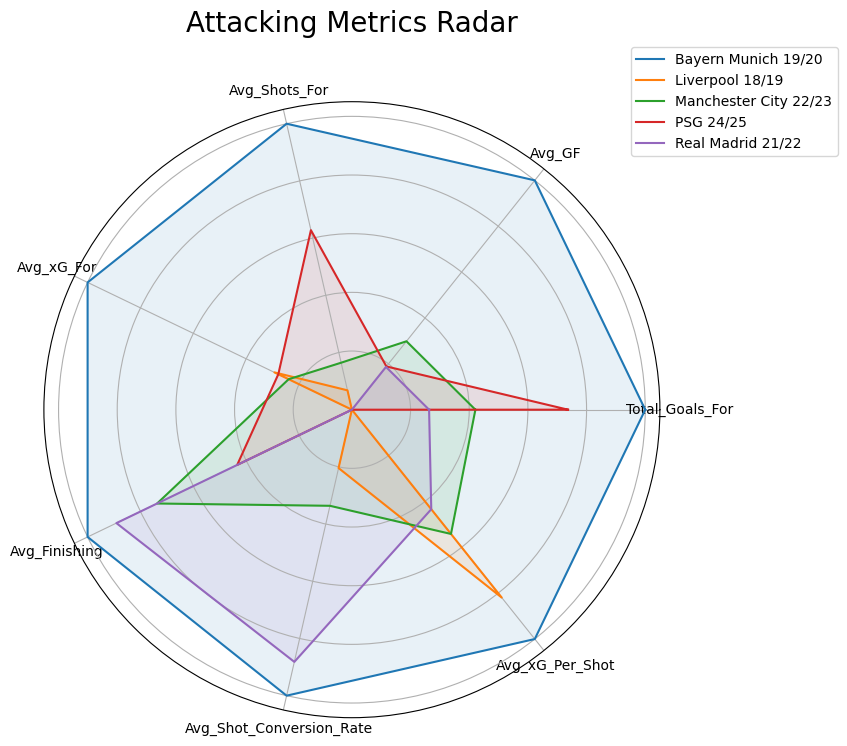

In [48]:
AttackingSummary = UCLTeamsModern.groupby('Team').agg(
    Total_Goals_For=('GF', 'sum'),
    Avg_GF=('GF', 'mean'),
    Avg_Shots_For=('Shots_For', 'mean'),
    Avg_xG_For=('xG_For', 'mean'),
    Avg_Finishing=('Finishing', 'mean'),
    Avg_Shot_Conversion_Rate=('Shot_Conversion_Rate', 'mean'),
    Avg_xG_Per_Shot=('xG_Per_Shot', 'mean')
)
AttackingSummary_scaled = AttackingSummary.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
labels = AttackingSummary.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for index, row in AttackingSummary_scaled.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Attacking Metrics Radar', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('attacking_radar.png')
plt.show()

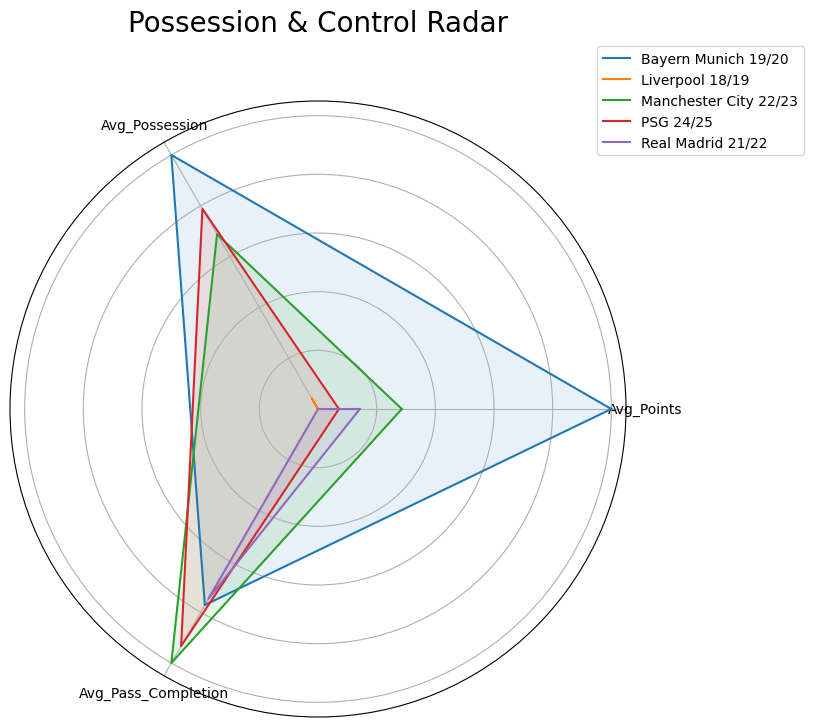

In [49]:
PossessionSummary = UCLTeamsModern.groupby('Team').agg(
    Avg_Points=('Points', 'mean'),
    Avg_Possession=('Poss%', 'mean'),
    Avg_Pass_Completion=('Pass_Cmp%_For', 'mean')
)
PossessionSummary_scaled = PossessionSummary.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
labels = PossessionSummary.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for index, row in PossessionSummary_scaled.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Possession & Control Radar', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('possession_radar.png')
plt.show()

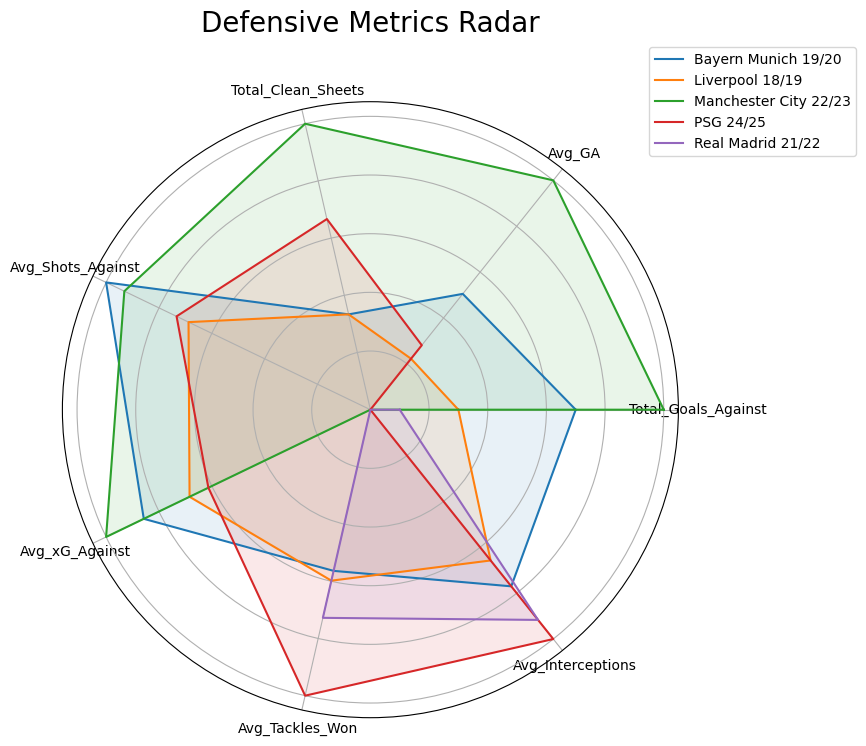

In [50]:
DefendingSummary = UCLTeamsModern.groupby('Team').agg(
    Total_Goals_Against=('GA', 'sum'),
    Avg_GA=('GA', 'mean'),
    Total_Clean_Sheets=('CleanSheet', 'sum'),
    Avg_Shots_Against=('Shots_Against', 'mean'),
    Avg_xG_Against=('xG_Against', 'mean'),
    Avg_Tackles_Won=('Tackles_Won_For', 'mean'),
    Avg_Interceptions=('Interceptions_For', 'mean')
)
lower_is_better = ['Total_Goals_Against', 'Avg_GA', 'Avg_Shots_Against', 'Avg_xG_Against']
DefendingSummary_scaled = DefendingSummary.copy()
for col in DefendingSummary_scaled.columns:
    if col in lower_is_better:
        DefendingSummary_scaled[col] = (DefendingSummary[col].max() - DefendingSummary[col]) / (DefendingSummary[col].max() - DefendingSummary[col].min())
    else:
        DefendingSummary_scaled[col] = (DefendingSummary[col] - DefendingSummary[col].min()) / (DefendingSummary[col].max() - DefendingSummary[col].min())
labels = DefendingSummary.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for index, row in DefendingSummary_scaled.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Defensive Metrics Radar', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('defensive_radar.png')
plt.show()

From this we can see that Bayern 19/20 matches here too as the most dominant UCL team.